## Computational Finance and Financial Management
    
Masters Seminar <div align="left">  Under the supervision of: 
    <div align="left"> Prof. Dr. Elmar Lukas , Gordon Briest
<div align="center"> Written by:
    
| <div align="right">  **Name**  </div>   | <div align="right">  **Student ID**  </div> 
| ------             |    ------             |  
| <div align="right">  Rafi Bin Arman | **230539** | 
| <div align="right">  Erida Gera  |  **235609** |    

<div align="Center"> 
    

    
<br/>    
<br/>
    
<div align="center"> Time frame: 06.01.2016-06.29.2021 (daily)
    
<br/>    
<br/>
    
<div align="center"> Group Asset:
    
 <div align="center">  **MSCI EM Small Cap UCITS ETF**     | 
| <div align="center">  **MSCI EM UCITS ETF**     |
| <div align="center">  **Gold**     |
|
       
    
   
    
</div>
<br/>
<br/>
<br/>

In [1]:
# Importing necessary Libraries
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
from matplotlib import style
import datetime as dt
from pandas_datareader import data
from datetime import datetime
import statsmodels.api as sm

In [2]:
# Importing data
data = pd.read_csv('C:/Users/49178/Computational Finance seminar/RAFI/newpython.data')

In [3]:
# Getting rid of null data
finaldata = data.dropna()

In [4]:
# Fixing the format of the date
finaldata.set_index("Date", inplace=True)
finaldata.index = pd.to_datetime(finaldata.index)

In [5]:
# Presenting dataset
finaldata.head()

IEMS   IQQE         Gold
Date                                     
2016-06-01  50.919810  27.97  1084.529331
2016-06-02  50.919786  28.14  1081.319284
2016-06-03  51.566680  27.98  1111.749628
2016-06-06  51.359319  28.37  1096.617039
2016-06-07  51.964364  28.69  1096.565301

---

# Historical Price Trend 

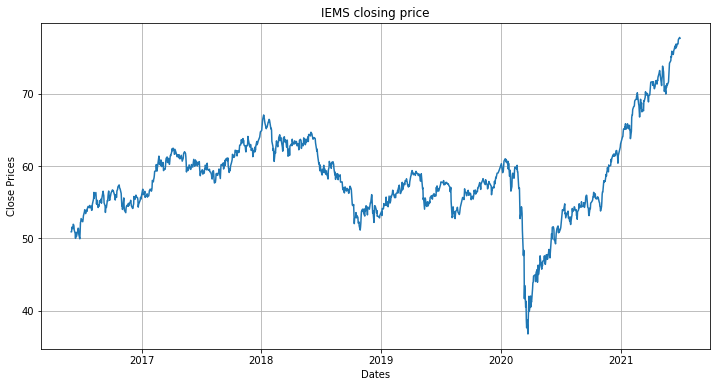

In [6]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(finaldata['IEMS'])
plt.title('IEMS closing price')
plt.show()

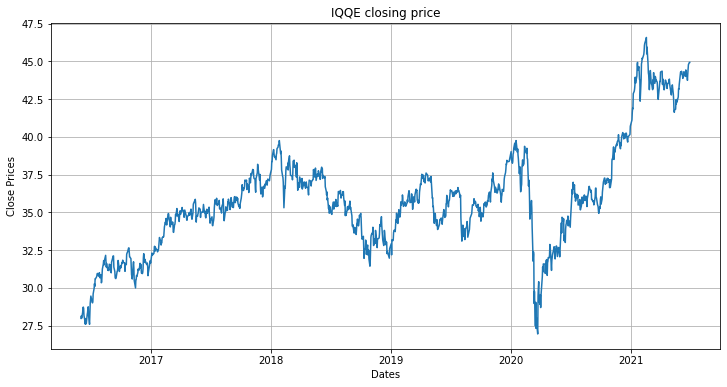

In [7]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(finaldata['IQQE'])
plt.title('IQQE closing price')
plt.show()

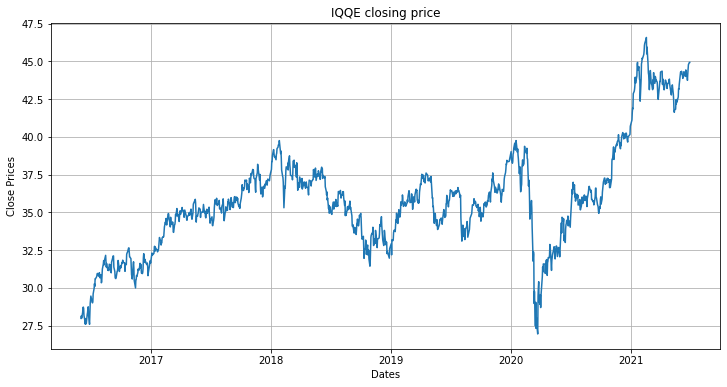

In [8]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(finaldata['IQQE'])
plt.title('IQQE closing price')
plt.show()

---

# Historical Price Change Trend

In [9]:
#the changing trend over daily basis
finaldata.diff().head()

IEMS  IQQE       Gold
Date                                 
2016-06-01       NaN   NaN        NaN
2016-06-02 -0.000024  0.17  -3.210047
2016-06-03  0.646894 -0.16  30.430344
2016-06-06 -0.207361  0.39 -15.132589
2016-06-07  0.605045  0.32  -0.051738

In [10]:
#the mean difference:
finaldata.diff().mean()

IEMS    0.022120
IQQE    0.014017
Gold    0.329205
dtype: float64

In [11]:
#the percentage change of the return:
finaldata.pct_change().round(2).head()

IEMS  IQQE  Gold
Date                        
2016-06-01   NaN   NaN   NaN
2016-06-02 -0.00  0.01 -0.00
2016-06-03  0.01 -0.01  0.03
2016-06-06 -0.00  0.01 -0.01
2016-06-07  0.01  0.01 -0.00

In [12]:
#The mean of the percentage change:
finaldata.pct_change().mean()

IEMS    0.000424
IQQE    0.000473
Gold    0.000304
dtype: float64

Text(0.5, 1.0, 'Bar diagram of the mean percentage change')

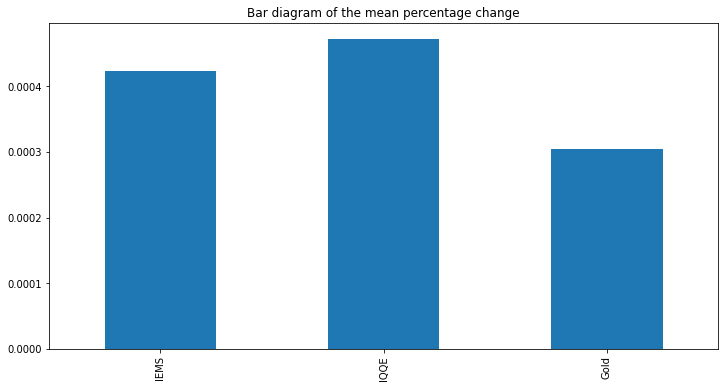

In [13]:
#The bar diagram of the mean percentage change:
finaldata.pct_change().mean().plot(kind='bar', figsize=(12,6))
plt.title('Bar diagram of the mean percentage change')

In [14]:
#The log return
logreturns = np.log(finaldata / finaldata.shift(1))

In [15]:
# Presenting log return of the asset
logreturns.head()

IEMS      IQQE      Gold
Date                                        
2016-06-01           NaN       NaN       NaN
2016-06-02 -4.713294e-07  0.006060 -0.002964
2016-06-03  1.262416e-02 -0.005702  0.027753
2016-06-06 -4.029328e-03  0.013842 -0.013705
2016-06-07  1.171178e-02  0.011216 -0.000047

In [16]:
# Getting rid of the null data
logreturns.dropna(inplace=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

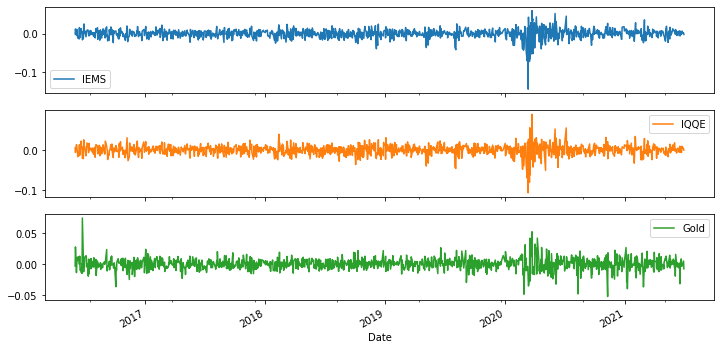

In [17]:
# Depicting the log return in subplots
logreturns.plot(subplots=True, figsize=(12, 6))

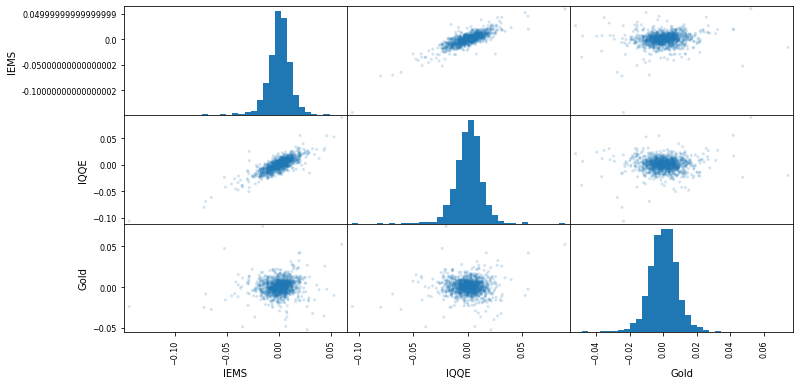

In [18]:
# Depicting the log returns of the assets against each other as a scatter matrix
pd.plotting.scatter_matrix(logreturns,
alpha=0.2,
diagonal='hist',
hist_kwds={'bins': 35},
figsize=(12, 6));

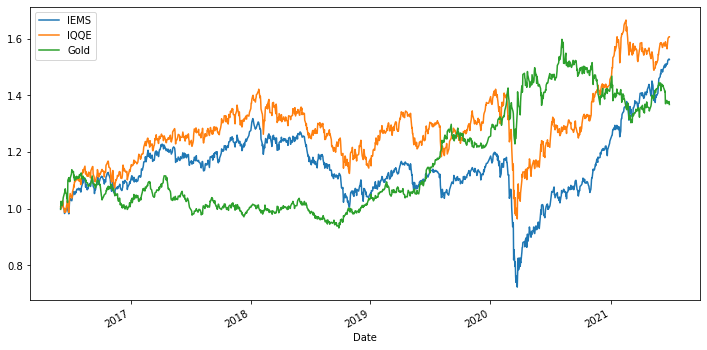

In [19]:
# Depicting the cumulative log returns 
logreturns.cumsum().apply(np.exp).plot(figsize=(12, 6));

---

# Rolling Statistics

In [20]:
# Constructing the Dataframe
RS_IEMS = pd.DataFrame(finaldata['IEMS']).dropna() 
RS_IQQE = pd.DataFrame(finaldata['IQQE']).dropna()
RS_Gold = pd.DataFrame(finaldata['Gold']).dropna()  

In [21]:
# Fixing the window
window = 20

In [22]:
# Calculation of minimum value
RS_IEMS['min'] = finaldata['IEMS'].rolling(window=window).min()
RS_IQQE['min'] = finaldata['IQQE'].rolling(window=window).min()
RS_Gold['min'] = finaldata['Gold'].rolling(window=window).min()

In [23]:
# Calculation of mean
RS_IEMS['mean'] = finaldata['IEMS'].rolling(window=window).mean()
RS_IQQE['mean'] = finaldata['IQQE'].rolling(window=window).mean()
RS_Gold['mean'] = finaldata['Gold'].rolling(window=window).mean()

In [24]:
# Calculation of standard deviation 
RS_IEMS['std'] = finaldata['IEMS'].rolling(window=window).std()
RS_IQQE['std'] = finaldata['IQQE'].rolling(window=window).std()
RS_Gold['std'] = finaldata['Gold'].rolling(window=window).std()

In [25]:
# Calculation of median
RS_IEMS['median'] = finaldata['IEMS'].rolling(window=window).median()
RS_IQQE['median'] = finaldata['IQQE'].rolling(window=window).median()
RS_Gold['median'] = finaldata['Gold'].rolling(window=window).median()

In [26]:
# Calculation of maximum value
RS_IEMS['max'] = finaldata['IEMS'].rolling(window=window).max()
RS_IQQE['max'] = finaldata['IQQE'].rolling(window=window).max()
RS_Gold['max'] = finaldata['Gold'].rolling(window=window).max()

In [27]:
# Calculation of exponentially weighted moving average
RS_IEMS['ewma'] = finaldata['IEMS'].ewm(halflife=0.5, min_periods=window).mean()
RS_IQQE['ewma'] = finaldata['IQQE'].ewm(halflife=0.5, min_periods=window).mean()
RS_Gold['ewma'] = finaldata['Gold'].ewm(halflife=0.5, min_periods=window).mean()

In [28]:
# Presenting different features of IEMS
RS_IEMS.dropna().head()

IEMS        min       mean       std     median        max  \
Date                                                                          
2016-06-28  50.889685  49.956942  50.993335  0.584694  50.942093  51.964364   
2016-06-29  52.208430  49.956942  51.057766  0.644144  51.009220  52.208430   
2016-06-30  52.330670  49.956942  51.128311  0.702822  51.109664  52.330670   
2016-07-01  52.754394  49.956942  51.187696  0.786955  51.109664  52.754394   
2016-07-05  52.342648  49.956942  51.236863  0.827894  51.109664  52.754394   

                 ewma  
Date                   
2016-06-28  50.706542  
2016-06-29  51.832958  
2016-06-30  52.206242  
2016-07-01  52.617356  
2016-07-05  52.411325

In [29]:
# Presenting different features of IQQE
RS_IQQE.dropna().head()

IQQE    min     mean       std  median    max       ewma
Date                                                                 
2016-06-28  28.30  27.58  28.1635  0.397178  28.170  28.74  28.165031
2016-06-29  28.97  27.58  28.2135  0.432876  28.210  28.97  28.768758
2016-06-30  29.19  27.58  28.2660  0.484131  28.275  29.19  29.084689
2016-07-01  29.45  27.58  28.3395  0.546053  28.335  29.45  29.358672
2016-07-05  29.04  27.58  28.3730  0.568128  28.335  29.45  29.119668

In [30]:
# Presenting different features of Gold
RS_Gold.dropna().head()

Gold          min         mean        std       median  \
Date                                                                        
2016-06-28  1187.847474  1081.319284  1131.939288  34.482941  1125.139030   
2016-06-29  1193.760652  1081.319284  1137.400854  35.221102  1132.437330   
2016-06-30  1187.482902  1096.565301  1142.709035  34.312440  1139.165010   
2016-07-01  1200.490226  1096.565301  1147.146065  35.803531  1142.454982   
2016-07-05  1216.962102  1096.565301  1153.163318  36.958664  1145.172981   

                    max         ewma  
Date                                  
2016-06-28  1202.549250  1189.650231  
2016-06-29  1202.549250  1192.733047  
2016-06-30  1202.549250  1188.795438  
2016-07-01  1202.549250  1197.566529  
2016-07-05  1216.962102  1212.113209

<AxesSubplot:xlabel='Date'>

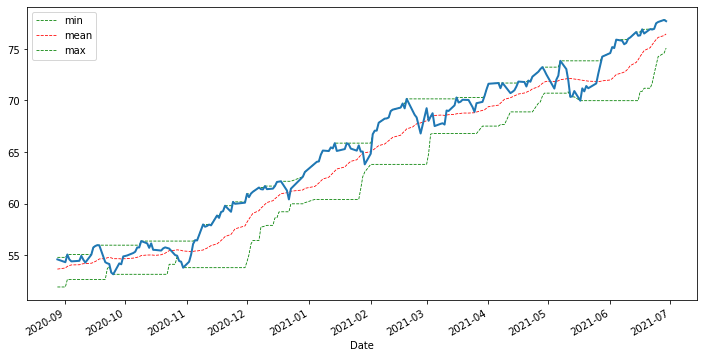

In [31]:
# Depicting the Rolling Statistics of IEMS data with min, max and mean
ax = RS_IEMS[['min', 'mean', 'max']].iloc[-200:].plot(
figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
finaldata['IEMS'].iloc[-200:].plot(ax=ax, lw=2.0)

<AxesSubplot:xlabel='Date'>

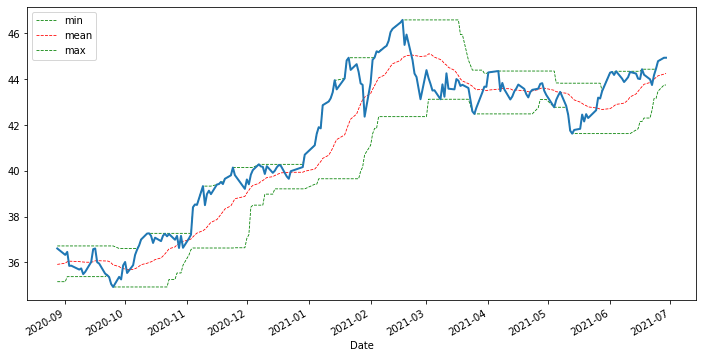

In [32]:
# Depicting the Rolling Statistics of IQQE data with min, max and mean
ax = RS_IQQE[['min', 'mean', 'max']].iloc[-200:].plot(
figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
finaldata['IQQE'].iloc[-200:].plot(ax=ax, lw=2.0)

<AxesSubplot:xlabel='Date'>

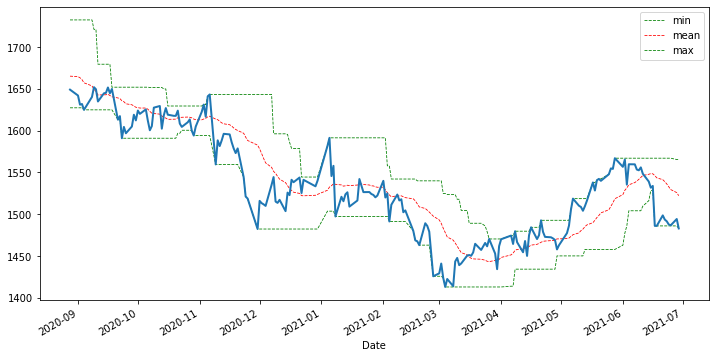

In [33]:
# Depicting the Rolling Statistics of Gold data with min, max and mean
ax = RS_Gold[['min', 'mean', 'max']].iloc[-200:].plot(
figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
finaldata['Gold'].iloc[-200:].plot(ax=ax, lw=2.0)

---

# Correlation Analysis:

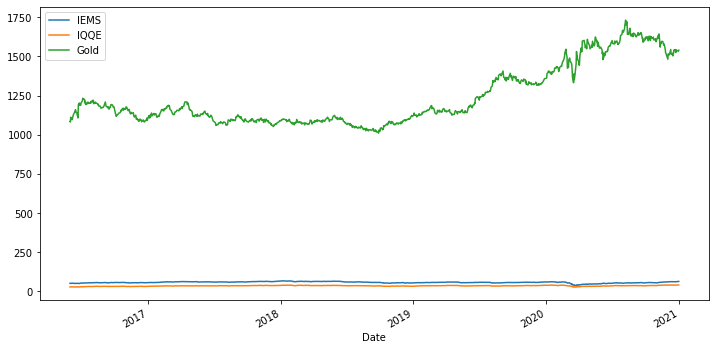

In [34]:
# Depicting the Assets in same plots
finaldata.loc[:'2020-12-31'].plot(secondary_y='.VIX', figsize=(12, 6));

In [35]:
#The correlation between each other assets
logreturns.corr()

IEMS      IQQE      Gold
IEMS  1.000000  0.811416  0.131668
IQQE  0.811416  1.000000  0.032145
Gold  0.131668  0.032145  1.000000

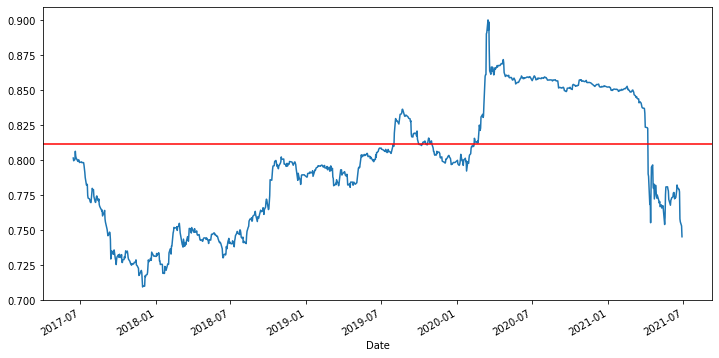

In [36]:
# Depicting the correlation of IQQE & IEMS with the static value to the plot as horizontal line
ax = logreturns['IQQE'].rolling(window=252).corr( logreturns['IEMS']).plot(figsize=(12, 6))
ax.axhline(logreturns.corr().iloc[0, 1], c='r')

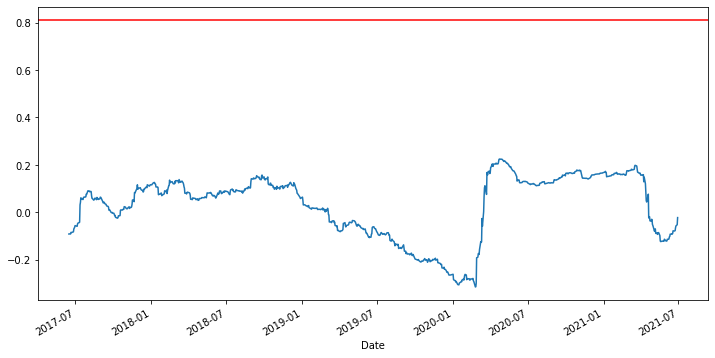

In [37]:
# Depicting the correlation of IQQE & Gold with the static value to the plot as horizontal line
ax = logreturns['IQQE'].rolling(window=252).corr( logreturns['Gold']).plot(figsize=(12, 6))
ax.axhline(logreturns.corr().iloc[0, 1], c='r')

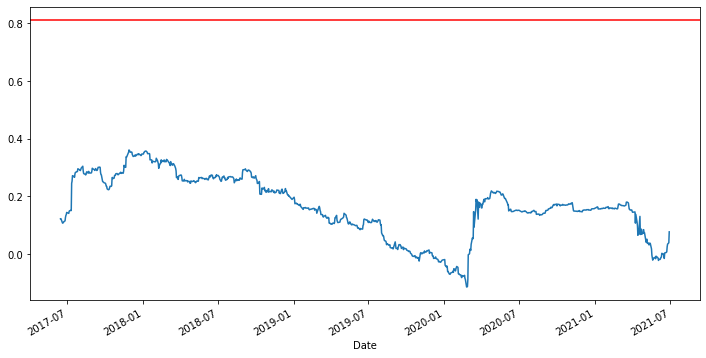

In [38]:
# Depicting the correlation of Gold & IEMS with the static value to the plot as horizontal line
ax = logreturns['Gold'].rolling(window=252).corr( logreturns['IEMS']).plot(figsize=(12, 6))
ax.axhline(logreturns.corr().iloc[0, 1], c='r')

---

# OLS Regression

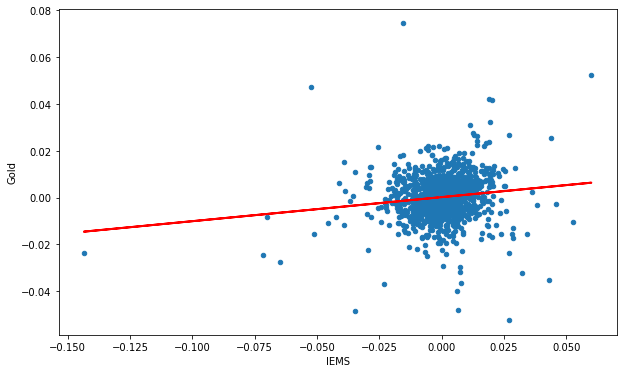

In [39]:
#Scatter Matrix of the Log returns of IEMS & Gold
reg = np.polyfit(logreturns['IEMS'],
logreturns['Gold'], deg=1)
ax = logreturns.plot(kind='scatter',
x='IEMS', y='Gold', figsize=(10, 6))
ax.plot(logreturns['IEMS'],
np.polyval(reg, logreturns['IEMS']), 'r', lw=2);

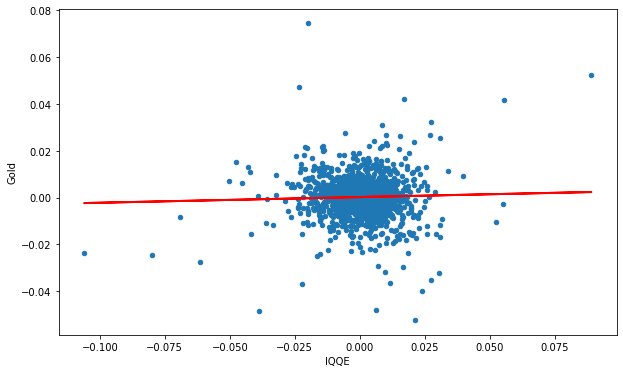

In [40]:
#Scatter Matrix of the Log returns of IQQE & Gold
reg = np.polyfit(logreturns['IQQE'],
logreturns['Gold'], deg=1)
ax = logreturns.plot(kind='scatter',
x='IQQE', y='Gold', figsize=(10, 6))
ax.plot(logreturns['IQQE'],
np.polyval(reg, logreturns['IQQE']), 'r', lw=2);

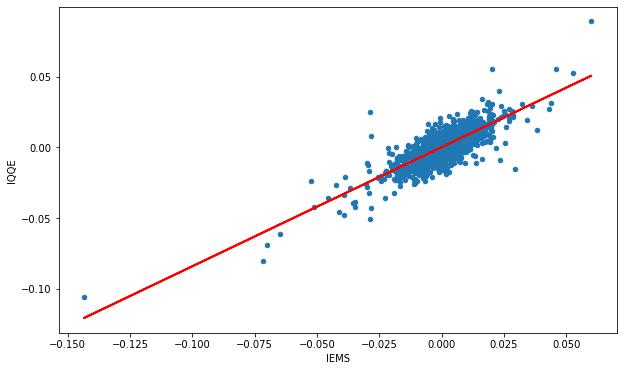

In [41]:
#Scatter Matrix of the Log returns of IEMS & IQQE
reg = np.polyfit(logreturns['IEMS'],
logreturns['IQQE'], deg=1)
ax = logreturns.plot(kind='scatter',
x='IEMS', y='IQQE', figsize=(10, 6))
ax.plot(logreturns['IEMS'],
np.polyval(reg, logreturns['IEMS']), 'r', lw=2);

---

# Testing of Stationarity

#Ho: It is non-stationary

#H1: It is stationary

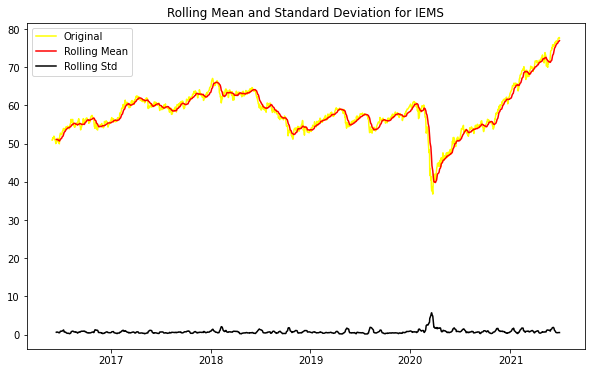

Results of dickey fuller test
Test Statistics                  -1.014764
p-value                           0.747841
No. of lags used                  7.000000
Number of observations used    1203.000000
critical value (1%)              -3.435797
critical value (5%)              -2.863946
critical value (10%)             -2.568051
dtype: float64


In [42]:
#Stationary Testing for IEMS
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation for IEMS')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are..
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(finaldata['IEMS'])

As the p-value is greater than 0.05 and the test statistics is greater than the critical values. 

So, we cannot reject the Null hypothesis. Therefore, the data is non-stationary.

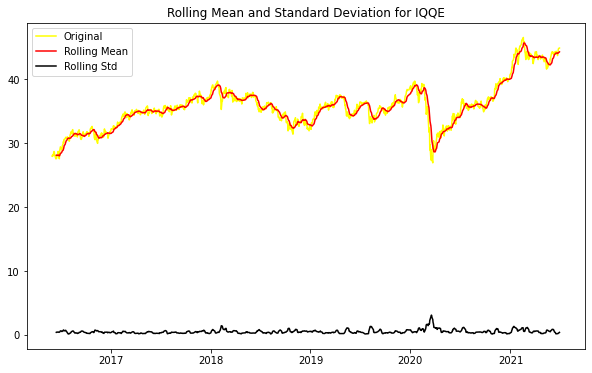

Results of dickey fuller test
Test Statistics                  -1.690324
p-value                           0.436105
No. of lags used                  1.000000
Number of observations used    1209.000000
critical value (1%)              -3.435770
critical value (5%)              -2.863934
critical value (10%)             -2.568044
dtype: float64


In [43]:
#Stationary Testing for IQQE
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation for IQQE')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are..
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(finaldata['IQQE'])

As the p-value is greater than 0.05 and the test statistics is greater than the critical values. 

So, we cannot reject the Null hypothesis. Therefore, the data is non-stationary.

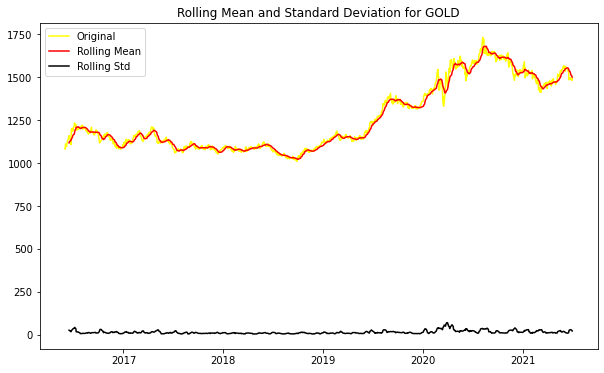

Results of dickey fuller test
Test Statistics                  -0.450342
p-value                           0.901348
No. of lags used                 20.000000
Number of observations used    1190.000000
critical value (1%)              -3.435857
critical value (5%)              -2.863972
critical value (10%)             -2.568065
dtype: float64


In [44]:
#Stationary Testing for IQQE
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation for GOLD')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are..
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(finaldata['Gold'])

As the p-value is greater than 0.05 and the test statistics is greater than the critical values. 

So, we cannot reject the Null hypothesis. Therefore, the data is non-stationary.

---

# Moving average  

Moving average separates Trend and Seasonality from the time series to remove stationarity

<Figure size 720x432 with 0 Axes>

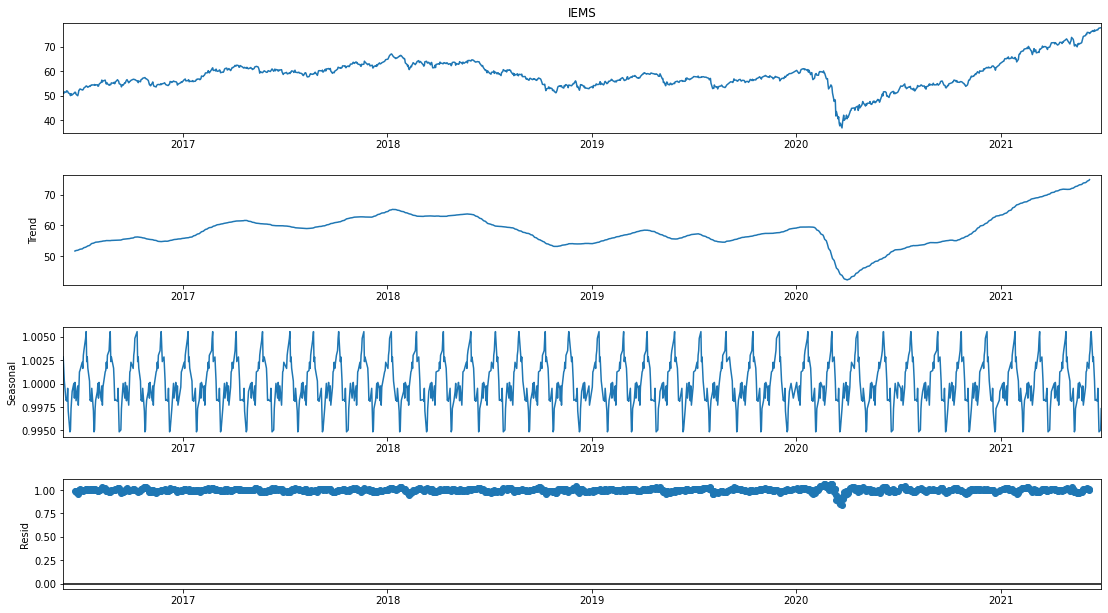

In [45]:
# Seasonality decomposing for IEMS
result = seasonal_decompose(finaldata['IEMS'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


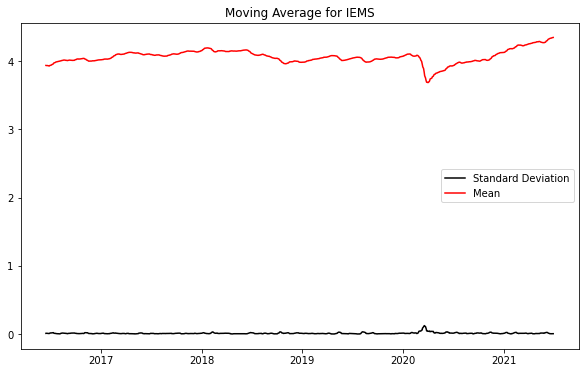

In [46]:
#Moving Average for IEMS
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_logL = np.log(finaldata['IEMS'])
moving_avg = df_logL.rolling(12).mean()
std_dev = df_logL.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average for IEMS')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

<Figure size 720x432 with 0 Axes>

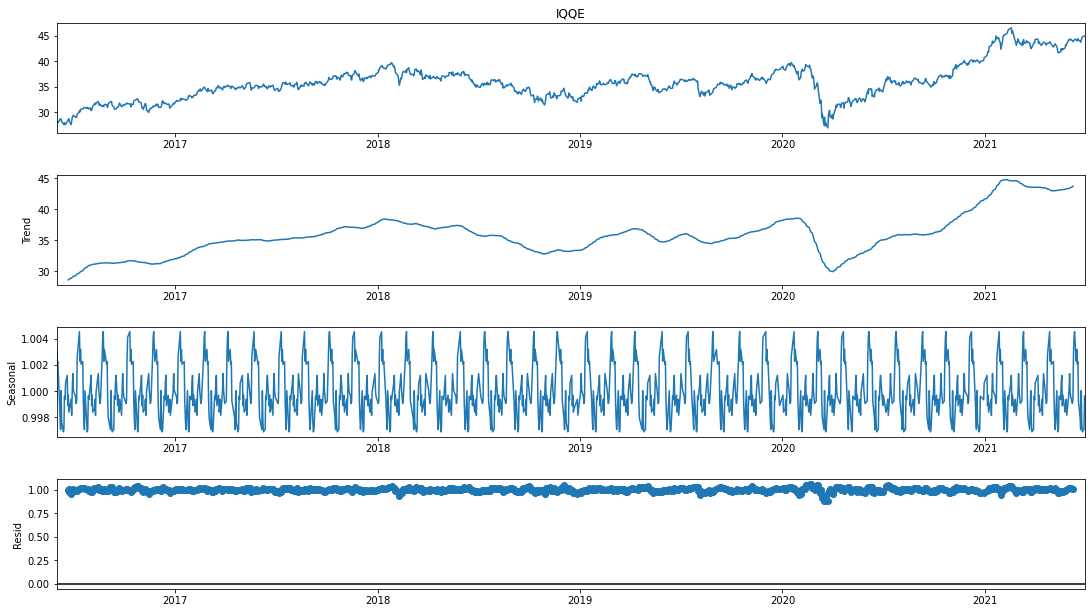

In [47]:
# Seasonality decomposing for IQQE
result = seasonal_decompose(finaldata['IQQE'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


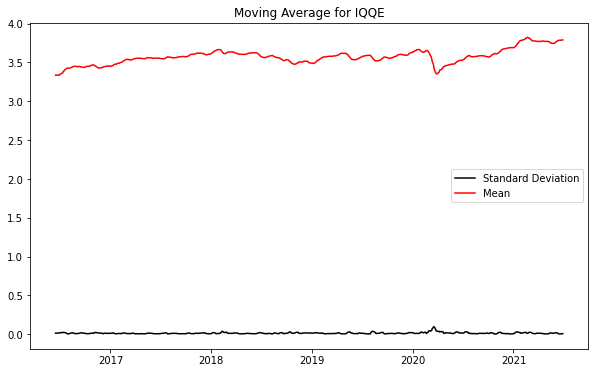

In [48]:
#Moving Average for IQQE
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_logD = np.log(finaldata['IQQE'])
moving_avg = df_logD.rolling(12).mean()
std_dev = df_logD.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average for IQQE')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

<Figure size 720x432 with 0 Axes>

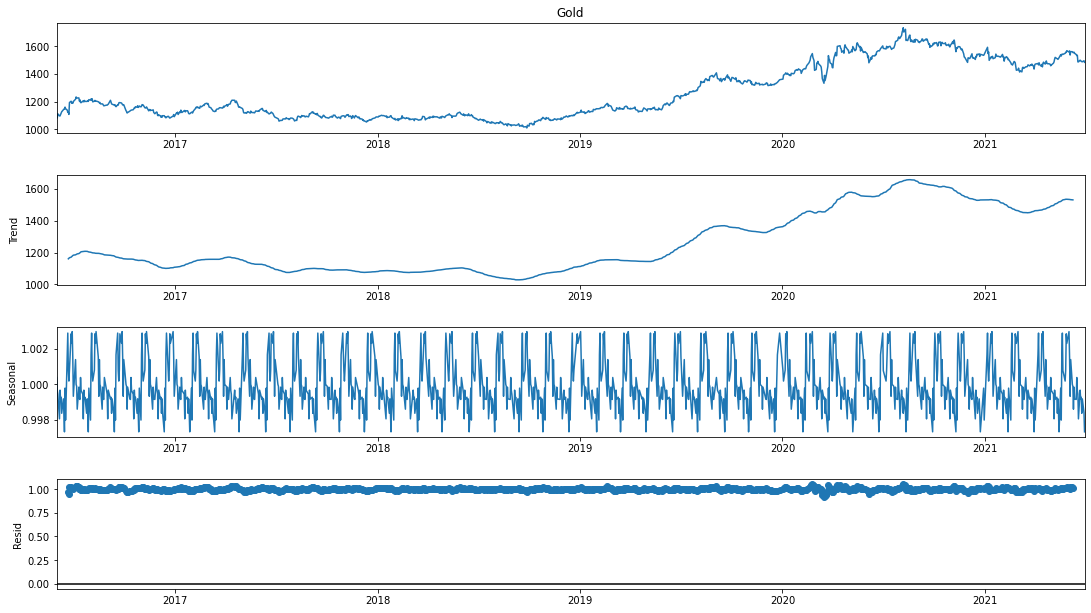

In [49]:
# Seasonality decomposing for Gold
result = seasonal_decompose(finaldata['Gold'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


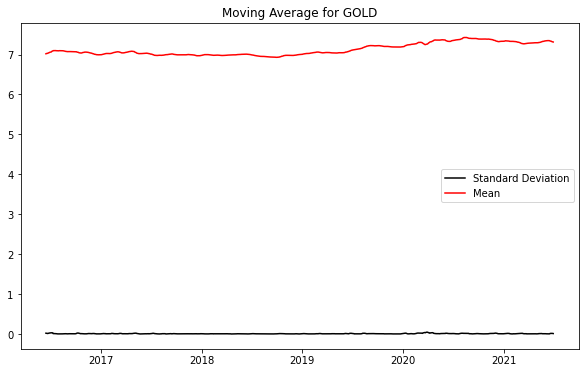

In [50]:
#Moving Average for Gold
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_logG = np.log(finaldata['Gold'])
moving_avg = df_logG.rolling(12).mean()
std_dev = df_logG.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average for GOLD')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

---

# ARIMA Model

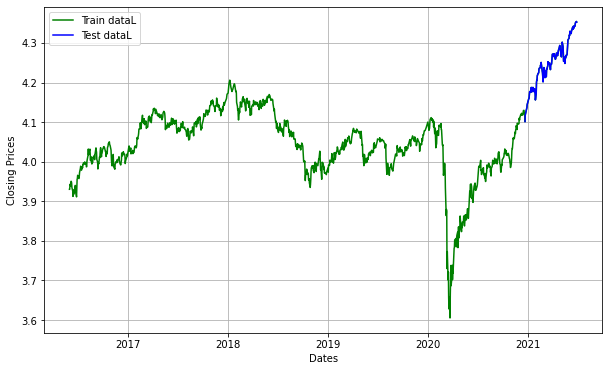

In [51]:
# Depicting Training and Test data for testing IEMS
train_dataL, test_dataL = df_logL[3:int(len(df_logL)*0.9)], df_logL[int(len(df_logL)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_logL, 'green', label='Train dataL')
plt.plot(test_dataL, 'blue', label='Test dataL')
plt.legend()

In [52]:
# Presenting ARIMA model summary for IEMS
model_autoARIMA_L = auto_arima(train_dataL, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA_L.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6419.238, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6436.557, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6434.448, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6421.055, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6436.845, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6438.488, Time=1.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6436.944, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6435.249, Time=0.76 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-6440.295, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-6438.627, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-6444.913, Time=1.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-6437.034, Time=0.58 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-6444.761, Time=1.27 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-6435.288, Time=0.41 sec

Best model:  ARIMA

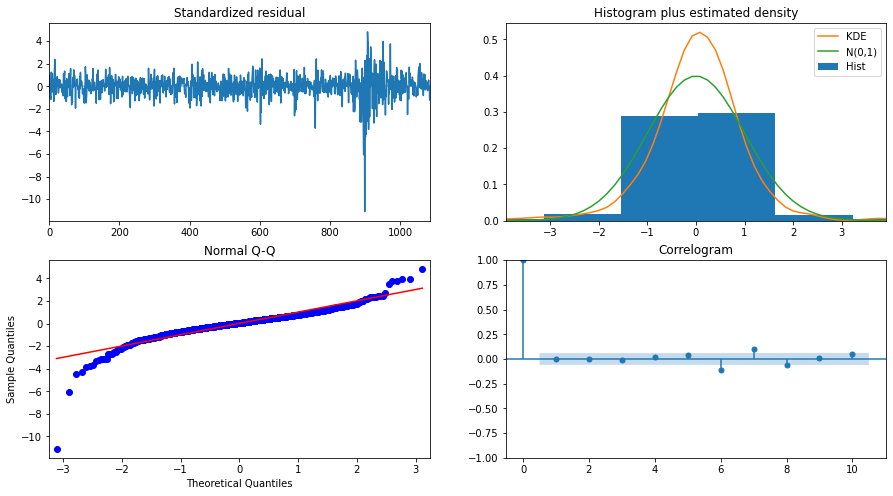

In [53]:
# Depicting ARIMA model diagnostics with different diagram for IEMS
model_autoARIMA_L.plot_diagnostics(figsize=(15,8))
plt.show()

In [54]:
# ARIMA Model Result for IEMS
model_L = ARIMA(train_dataL, order=(3, 1, 2))
fitted_L = model_L.fit(disp=-1)
print(fitted_L.summary())

c:\users\49178\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\49178\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.IEMS   No. Observations:                 1085
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3232.348
Method:                       css-mle   S.D. of innovations              0.012
Date:                Fri, 09 Jul 2021   AIC                          -6450.696
Time:                        02:33:18   BIC                          -6415.771
Sample:                             1   HQIC                         -6437.475
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.000      0.362      0.718      -0.001       0.001
ar.L1.D.IEMS    -0.2912      0.105     -2.763      0.006      -0.498      -0.085
ar.L2.D.IEMS     0.6762      0.099      6.80

---

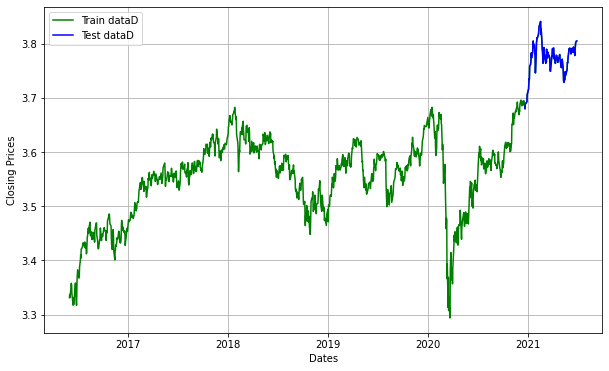

In [55]:
# Depicting Training and Test data for testing IQQE
train_dataD, test_dataD = df_logD[3:int(len(df_logD)*0.9)], df_logD[int(len(df_logD)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_logD, 'green', label='Train dataD')
plt.plot(test_dataD, 'blue', label='Test dataD')
plt.legend()

In [56]:
# Presenting ARIMA model summary for IQQE
model_autoARIMA_D = auto_arima(train_dataD, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA_D.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5837.164, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6352.651, Time=0.67 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-6351.417, Time=1.34 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2919.971, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-6334.710, Time=1.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6358.571, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3795.628, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-6348.568, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-6360.492, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-6360.501, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-63

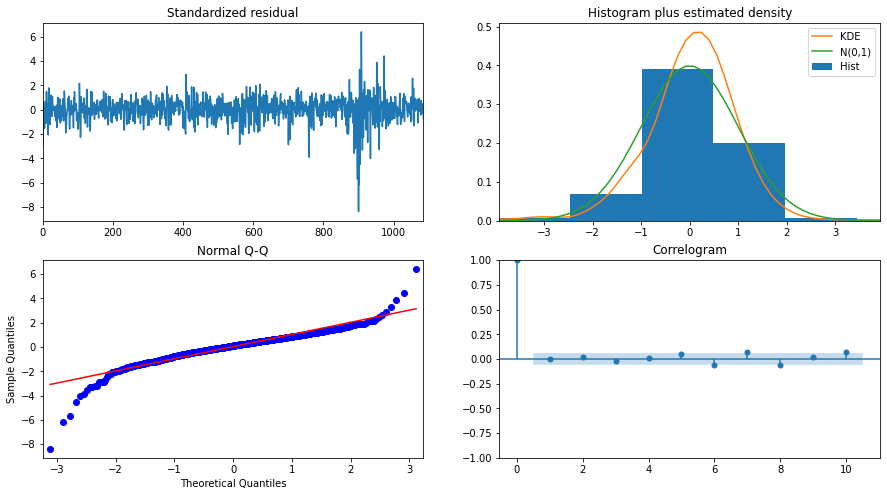

In [57]:
# Depicting ARIMA model diagnostics with different diagram for IQQE
model_autoARIMA_D.plot_diagnostics(figsize=(15,8))
plt.show()

In [58]:
# ARIMA Model Result for IQQE
model_D = ARIMA(train_dataD, order=(3, 1, 2))
fitted_D = model_D.fit(disp=-1)
print(fitted_D.summary())

c:\users\49178\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\49178\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.IQQE   No. Observations:                 1085
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3194.521
Method:                       css-mle   S.D. of innovations              0.013
Date:                Fri, 09 Jul 2021   AIC                          -6375.041
Time:                        02:33:30   BIC                          -6340.116
Sample:                             1   HQIC                         -6361.820
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.000      0.869      0.385      -0.000       0.001
ar.L1.D.IQQE    -1.6740      0.069    -24.406      0.000      -1.808      -1.540
ar.L2.D.IQQE    -1.0556      0.099    -10.68

---

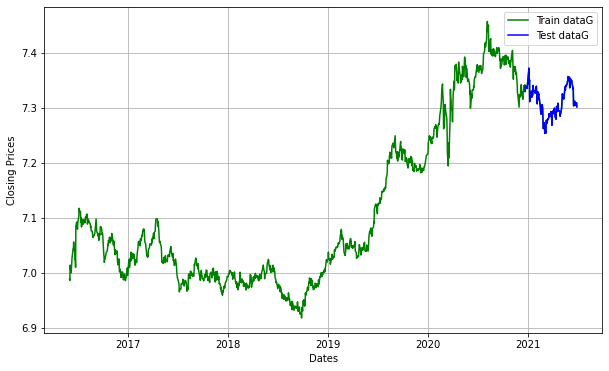

In [59]:
# Depicting Training and Test data for testing Gold
train_dataG, test_dataG = df_logG[3:int(len(df_logG)*0.9)], df_logG[int(len(df_logG)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_logG, 'green', label='Train dataG')
plt.plot(test_dataG, 'blue', label='Test dataG')
plt.legend()

In [60]:
# Presenting ARIMA model summary for Gold
model_autoARIMA_G = auto_arima(train_dataG, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA_G.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7036.012, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7044.648, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7044.145, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7036.801, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7043.151, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7043.094, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7040.814, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7045.178, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-7043.743, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7043.664, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7044.649, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-7041.488, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.876 seconds
                               SARIMAX Results                              

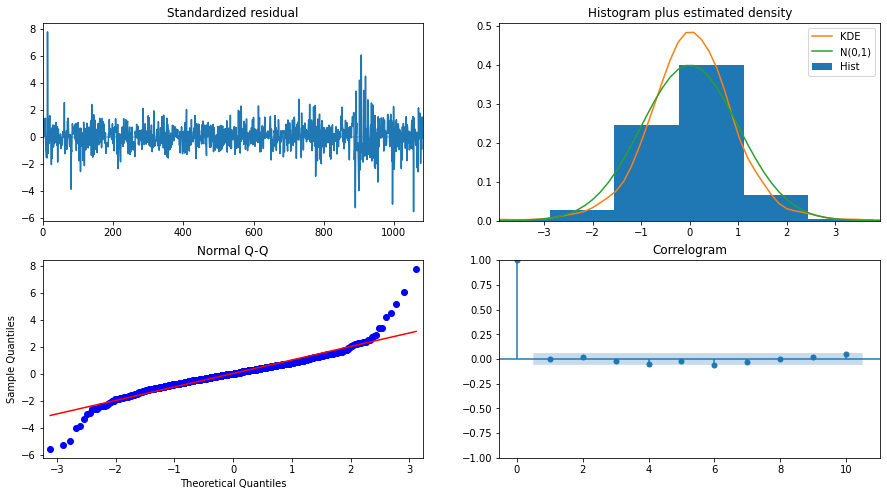

In [61]:
# Depicting ARIMA model diagnostics with different diagram for Gold
model_autoARIMA_G.plot_diagnostics(figsize=(15,8))
plt.show()

In [62]:
# ARIMA Model Result for Gold
model_G = ARIMA(train_dataG, order=(3, 1, 2))
fitted_G = model_G.fit(disp=-1)
print(fitted_G.summary())

c:\users\49178\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\49178\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Gold   No. Observations:                 1085
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3533.398
Method:                       css-mle   S.D. of innovations              0.009
Date:                Fri, 09 Jul 2021   AIC                          -7052.796
Time:                        02:33:34   BIC                          -7017.870
Sample:                             1   HQIC                         -7039.574
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.000      1.266      0.205      -0.000       0.001
ar.L1.D.Gold     1.4918      0.054     27.388      0.000       1.385       1.599
ar.L2.D.Gold    -0.7040      0.073     -9.63

---

# Analyse Risk & Return

In [63]:
# Organizing and Importing stock wise data
IEMS = ['Date', 'IEMS']
IQQE = ['Date', 'IQQE']
Gold = ['Date', 'Gold']

StockI = pd.read_csv('C:/Users/49178/Computational Finance seminar/RAFI/newpython.data', skipinitialspace=True, usecols=IEMS)
StockQ = pd.read_csv('C:/Users/49178/Computational Finance seminar/RAFI/newpython.data', skipinitialspace=True, usecols=IQQE)
StockG = pd.read_csv('C:/Users/49178/Computational Finance seminar/RAFI/newpython.data', skipinitialspace=True, usecols=Gold)

In [64]:
# Fixing the format of the date
StockI.set_index("Date", inplace=True)
StockI.index = pd.to_datetime(StockI.index)
StockQ.set_index("Date", inplace=True)
StockQ.index = pd.to_datetime(StockQ.index)
StockG.set_index("Date", inplace=True)
StockG.index = pd.to_datetime(StockG.index)

In [65]:
# Indicating style used
style.use('fivethirtyeight')
yf.pdr_override()

# Stocks to been selected
selected = ['StockI', 'StockQ', 'StockG']

In [66]:
# Importing ACWI data for market return as given assets and ACWI are correlated
start = dt.datetime(2016, 1, 6)
end = dt.datetime(2021, 6, 29)

market_return = web.get_data_yahoo("ACWI", start, end)

[*********************100%***********************]  1 of 1 completed


In [67]:
market_return

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-05   54.840000   54.970001   54.570000   54.880001   49.095955   
2016-01-06   53.950001   54.299999   53.759998   54.049999   48.353439   
2016-01-07   53.099998   53.570000   52.689999   52.790001   47.226238   
2016-01-08   53.110001   53.230000   52.110001   52.180000   46.680519   
2016-01-11   52.570000   52.669998   51.700001   52.240002   46.734207   
...                ...         ...         ...         ...         ....   
2021-06-22  100.110001  100.800003   99.910004  100.650002  100.650002   
2021-06-23  100.650002  100.900002  100.389999  100.459999  100.459999   
2021-06-24  101.099998  101.239998  101.029999  101.169998  101.169998   
2021-06-25  101.510002  101.639999  101.360001  101.580002  101.580002   
2021-06-28  101.529999  101.599998  101.230003  101.550003  101.550003   

             Volume  
Date                 
2016-01-05  3243700  
2016-01-06  4615000  
2016-01-07  3396400  
2016-01-08  2437800  
2016-01-11  2958400  
...             ...  
2021-06-22  1620100  
2021-06-23  2294700  
2021-06-24  2866200  
2021-06-25  3247400  
2021-06-28  3817400  

[1380 rows x 6 columns]

In [68]:
# Calculation of the Percentage Change of three assets and market return
return_I = StockI['IEMS'].pct_change()[1:]
return_Q = StockQ['IQQE'].pct_change()[1:]
return_G = StockG['Gold'].pct_change()[1:]
return_acwi = market_return['Close'].pct_change()[1:]

In [69]:
#Preparing an Array consisting of the Percentage Change of Given assets and ACWI
returns = pd.DataFrame()
returns[selected[0]] = return_I
returns[selected[1]] = return_Q
returns[selected[2]] = return_G
returns['ACWI'] = return_acwi
returns = returns.dropna() # drop first missing row
print(returns.head())

                  StockI    StockQ    StockG      ACWI
Date                                                  
2016-06-02 -4.713293e-07  0.006078 -0.002960  0.001752
2016-06-03  1.270418e-02 -0.005686  0.028142  0.002798
2016-06-06 -4.021221e-03  0.013939 -0.013612  0.006104
2016-06-07  1.178063e-02  0.011280 -0.000047  0.003987
2016-06-08 -1.087861e-03  0.001046  0.009733  0.003798


Text(0.5, 1.0, 'Price Returns for three stocks & ACWI')

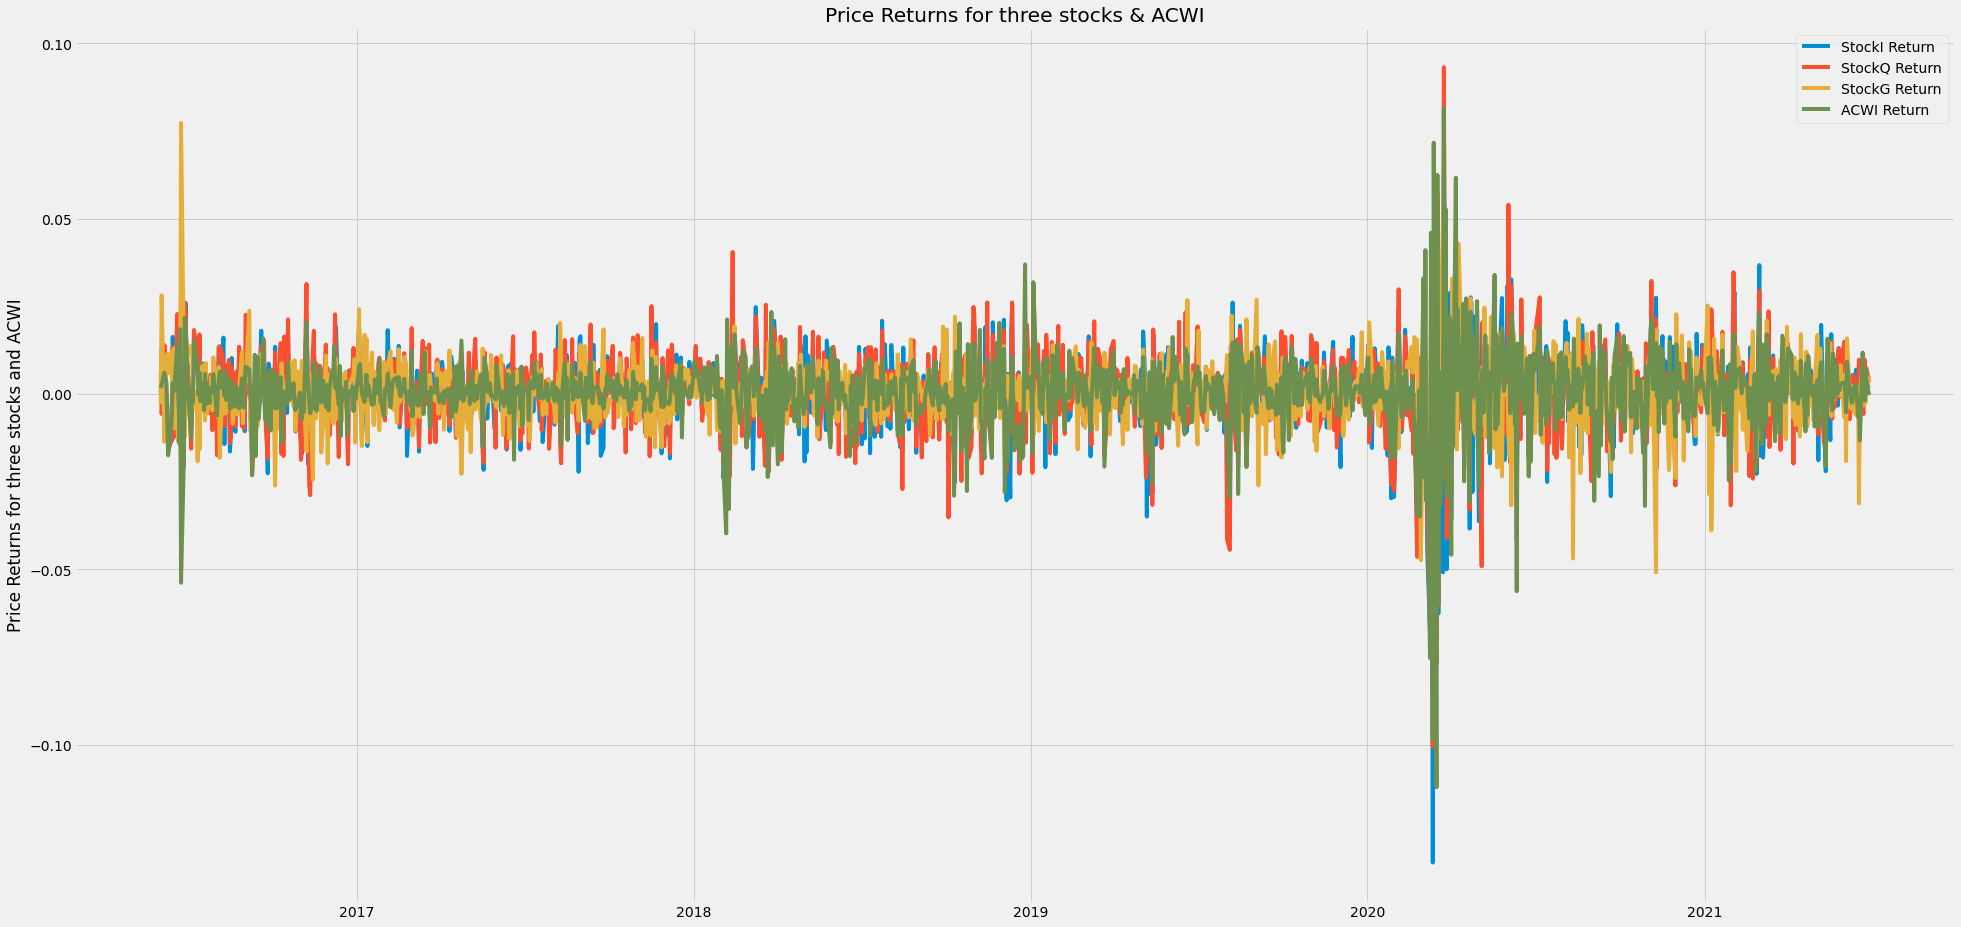

In [70]:
# Price Returns plot of three assets and ACWI

plt.figure(figsize=(30,15))
plt.plot(returns[selected[0]], label=selected[0] +' Return')
plt.plot(returns[selected[1]], label=selected[1] +' Return')
plt.plot(returns[selected[2]], label=selected[2] +' Return')
plt.plot(returns['ACWI'], label="ACWI Return")
plt.legend()
plt.grid(True)
plt.ylabel("Price Returns for three stocks and ACWI")
plt.title('Price Returns for three stocks & ACWI')

Text(0.5, 1.0, 'Price Returns for three stocks')

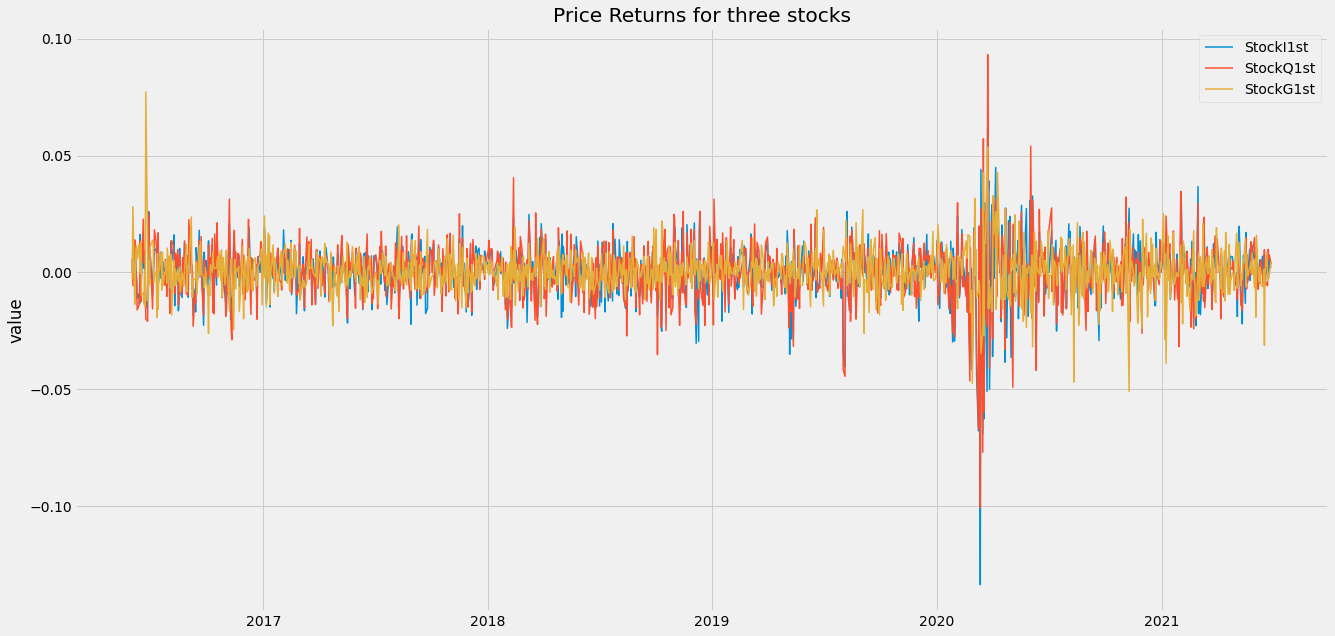

In [71]:
# Price Returns plot of three assets against each other

plt.figure(figsize=(20,10))
plt.plot(returns[selected[0]], lw=1.5, label=selected[0] +'1st')
plt.plot(returns[selected[1]], lw=1.5, label=selected[1] +'1st')
plt.plot(returns[selected[2]], lw=1.5, label=selected[2] +'1st')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.ylabel('value')
plt.title('Price Returns for three stocks')

Text(0.5, 1.0, 'Price Returns for ACWI')

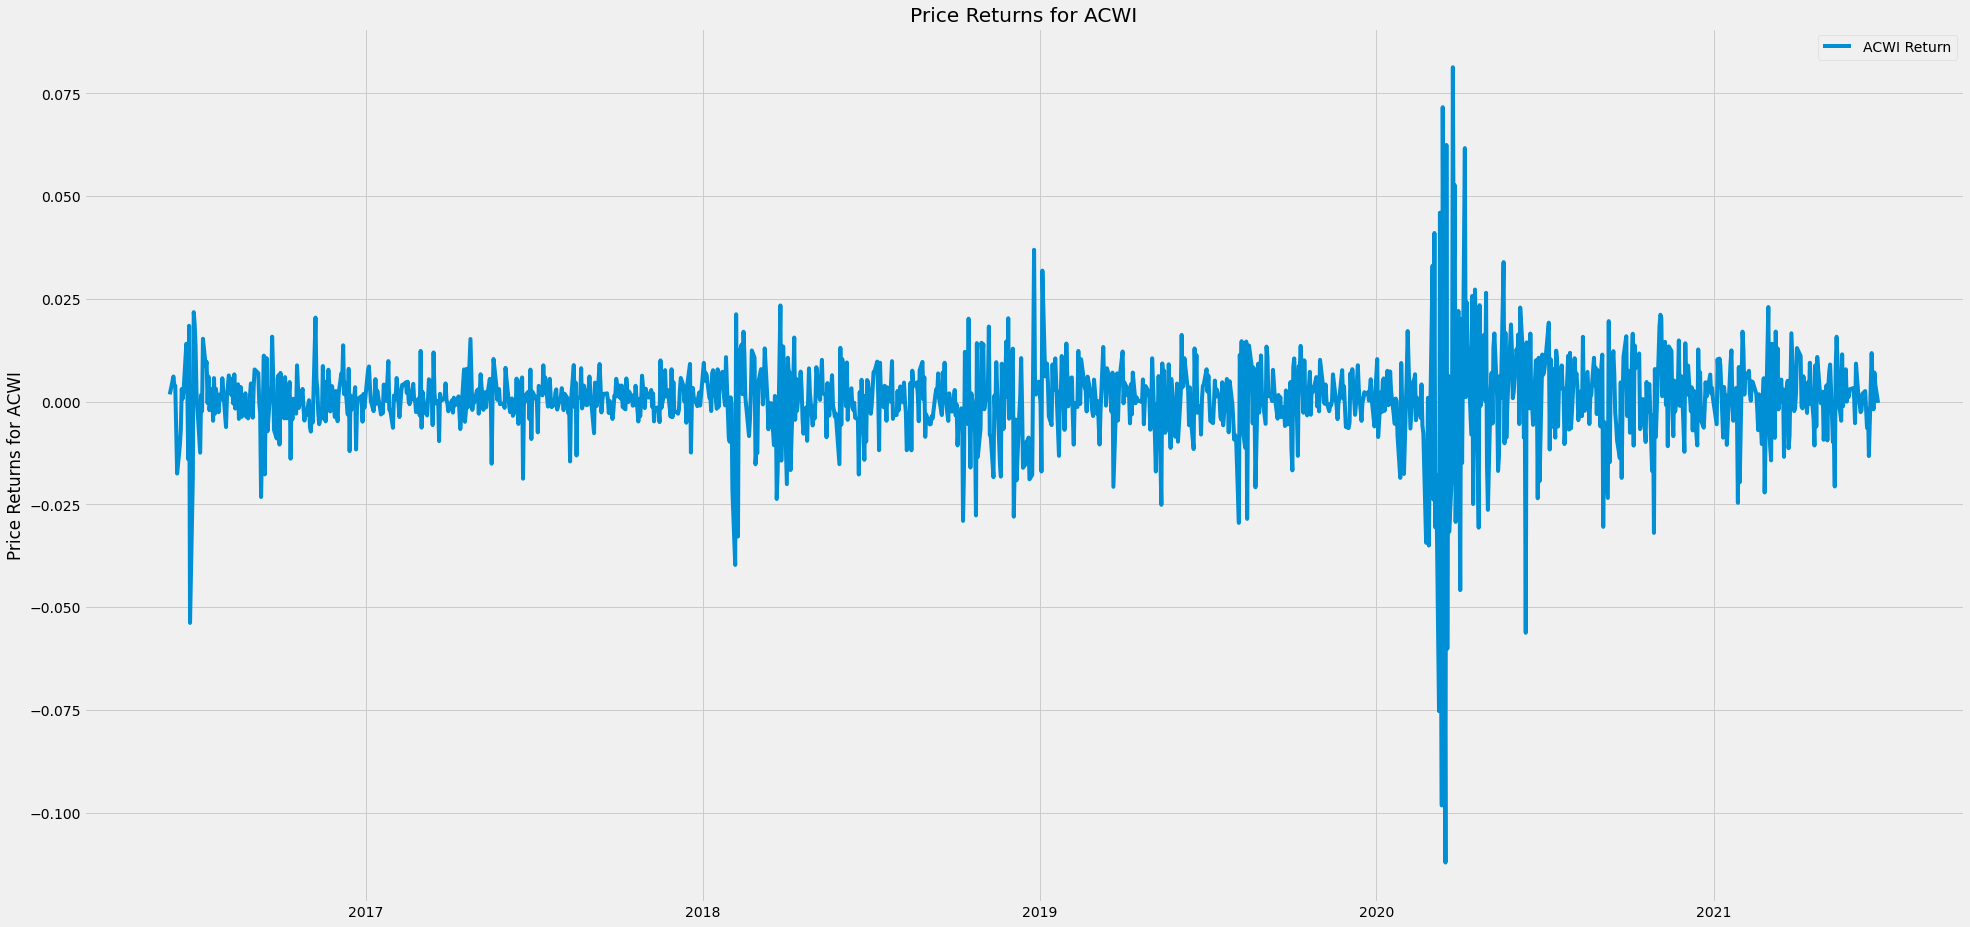

In [72]:
# Price Returns plot of ACWI

plt.figure(figsize=(30,15))
plt.plot(returns['ACWI'], label="ACWI Return")
plt.legend()
plt.grid(True)
plt.ylabel("Price Returns for ACWI")
plt.title('Price Returns for ACWI')

In [73]:
# Pice Return values of ACWI
M = returns['ACWI'].values
# Return values of stocks
I = returns[selected[0]].values
Q = returns[selected[1]].values
G = returns[selected[2]].values

In [74]:
# Calculating Alpha and Beta of three stocks using OLS regression
def linreg(x,y):
    # Add a constant to the independent value
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()

    x = x[:, 1]# cleaning the row we add
    return results.params


Beta_I_stock = linreg(M,I)[1]
Beta_Q_stock = linreg(M,Q)[1]
Beta_G_stock = linreg(M,G)[1]

Alpha_I_stock = linreg(M,I)[0]
Alpha_Q_stock = linreg(M,Q)[0]
Alpha_G_stock = linreg(M,G)[0]

print("Alpha_I:"+str(Alpha_I_stock))
print("Alpha_Q:"+str(Alpha_Q_stock))
print("Alpha_G:"+str(Alpha_G_stock))

print("Beta_I:"+str(Beta_I_stock))
print("Beta_Q:"+str(Beta_Q_stock))
print("Beta_G:"+str(Beta_G_stock))

Alpha_I:1.54169491301658e-05
Alpha_Q:3.66470650168379e-05
Alpha_G:0.0002788568739981845
Beta_I:0.678201620162502
Beta_Q:0.7459439219868969
Beta_G:0.03038215317128633


In [75]:
# CAPM r(equity) = r(f) + B(equity)(r(m) - r(f))
return_market = return_acwi.mean() * 1260
print ("return_market :"+str(return_market))
risk_free= 0.0025  # source of TB <https://www.bloomberg.com/markets/rates-bonds/government-bonds/us>

return_market :0.6441567871220206


In [76]:
#calculating return on equity for three stocks
def retequ(Beta, risk_free):
    return_equity = risk_free + Beta*(return_market - risk_free)
    return return_equity
# Array of return of individual stocks
return_of_stocks = [retequ(Beta_I_stock, Alpha_I_stock), retequ(Beta_Q_stock, Alpha_Q_stock), retequ(Beta_G_stock, Alpha_G_stock)]
print(return_of_stocks)

[0.4368731378140783, 0.48051415056988755, 0.019841254774404418]


In [77]:
# Random weight for porfolio estimation
weights = np.random.random(3)
weights /= np.sum(weights)
print(weights)

[0.38508544 0.39050166 0.22441289]


In [78]:
# Correlation between three stocks and ACWI
print(returns.corr())
returns = returns[returns.columns.drop('ACWI')]

          StockI    StockQ    StockG      ACWI
StockI  1.000000  0.775323  0.131955  0.657330
StockQ  0.775323  1.000000  0.034467  0.692536
StockG  0.131955  0.034467  1.000000  0.036998
ACWI    0.657330  0.692536  0.036998  1.000000


In [79]:
# Portfolio Return
print(np.sum(return_of_stocks * weights))

0.360327695547526


In [80]:
# Portfolio Volatility
print(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 1260, weights))))

0.3266319668628796


---

# Optimality of Portfolio

In [81]:
# Monte Carlo simulation for getting weights for three stocks
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []
num_assets = len(selected)
for p in range (100000) :
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_returns.append(np.sum(return_of_stocks * weights))
    port_volatility.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 1260, weights))))
    sharpe = np.sum(return_of_stocks * weights) / np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 1260, weights)))
    sharpe_ratio.append(sharpe)
    stock_weights.append(weights)

In [82]:
# Dictionary of Monte Carlo results
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# Extending the dictionary to accomodate weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# Make a dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

    Returns  Volatility  Sharpe Ratio  StockI Weight  StockQ Weight  \
0  0.380444    0.339756      1.119755       0.293161       0.517384   
1  0.310846    0.297583      1.044571       0.320927       0.341170   
2  0.198819    0.266629      0.745678       0.200851       0.206691   
3  0.360457    0.328794      1.096298       0.148064       0.605350   
4  0.453213    0.398392      1.137606       0.552953       0.440167   

   StockG Weight  
0       0.189455  
1       0.337902  
2       0.592458  
3       0.246587  
4       0.006880  


Text(0.5, 1.0, 'Efficient Frontier')

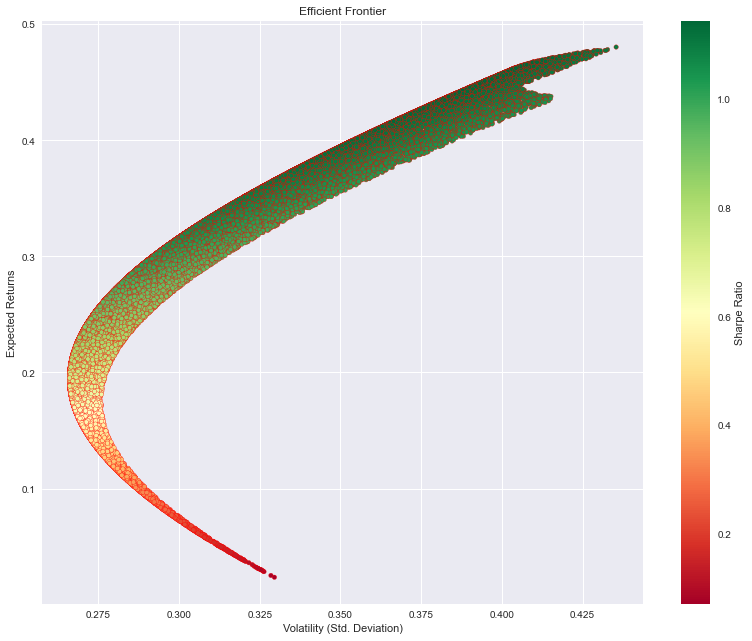

In [83]:
# Reorderinf dataframe columns
df = df[column_order]
print(df.head())

# Plot frontier with a scatterplot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', cmap='RdYlGn', edgecolors='red', figsize=(12, 10), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

---

# # Minimum Variance Portfolio & Tangent Portfolio

In [84]:
# Find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# Use the min, max values to locate and create the two special portfolios
tangent_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# min risk / return
min_variance_port_info = df['Volatility'] == min_volatility
tangent_port_info = df['Sharpe Ratio'] == max_sharpe

Text(0.5, 1.0, 'Efficient Frontier')

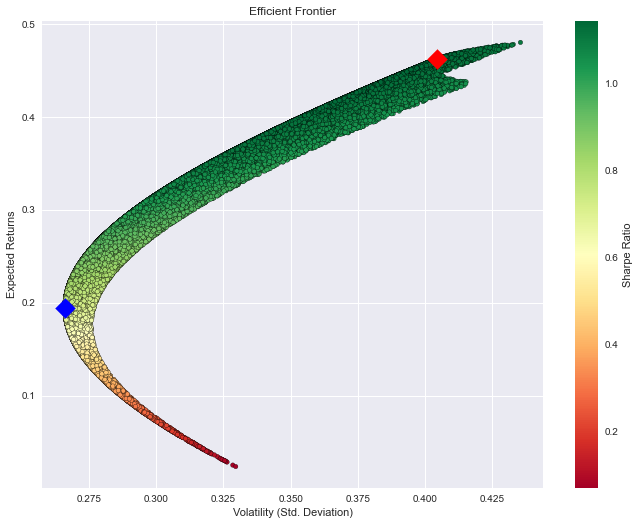

In [85]:
# Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=tangent_portfolio['Volatility'], y=tangent_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

In [86]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(tangent_portfolio.T)

plt.show()

                  88335
Returns        0.194429
Volatility     0.266064
Sharpe Ratio   0.730761
StockI Weight  0.134637
StockQ Weight  0.257102
StockG Weight  0.608261
                   6664
Returns        0.462866
Volatility     0.404495
Sharpe Ratio   1.144307
StockI Weight  0.403432
StockQ Weight  0.596476
StockG Weight  0.000091


---

# The expected return and the determined volatility are not enough to characterize the optimal portfolio. 

# Other matrics such as Sharpe Ratio and Correlation between the assets also should be included when choosing the optimal potfolio.

---

# Portfolio Construction and Evaluation 


In [87]:
# Importing the necessary library 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [88]:
# Getting the latest price
latest_prices = get_latest_prices(finaldata)

In [89]:
# Showing the latest price
latest_prices

IEMS      77.684820
IQQE      44.930000
Gold    1482.867401
Name: 2021-06-29 00:00:00, dtype: float64

In [90]:
# Constructing dataframe for portfolio
Stock_Values_MVP = {'Stock': ['StockI','StockQ','StockG'],
                'Weight': ['0.13','0.26','0.61'],
                'latest_prices': ['77.684820', '44.930000', '1482.867401']}

Stock_Values_TP = {'Stock': ['StockI','StockQ','StockG'],
                'Weight': ['0.41','0.58','0.003'],
                'latest_prices': ['77.684820', '44.930000', '1482.867401']}

Portfolio_MVP = pd.DataFrame(Stock_Values_MVP)
Portfolio_TP = pd.DataFrame(Stock_Values_TP)

In [91]:
#Presenting the Minimum Variance Portfolio
Portfolio_MVP.head()

Stock Weight latest_prices
0  StockI   0.13     77.684820
1  StockQ   0.26     44.930000
2  StockG   0.61   1482.867401

In [92]:
#Presenting the Tangent Portfolio
Portfolio_TP.head()

Stock Weight latest_prices
0  StockI   0.41     77.684820
1  StockQ   0.58     44.930000
2  StockG  0.003   1482.867401

In [93]:
# Fixing the datatype
Portfolio_MVP["Weight"] = Portfolio_MVP["Weight"].astype(np.float16)
Portfolio_TP["Weight"] = Portfolio_TP["Weight"].astype(np.float16)

In [94]:
# # Fixing the datatype
Portfolio_MVP["latest_prices"] = Portfolio_MVP["latest_prices"].astype(np.float16)
Portfolio_TP["latest_prices"] = Portfolio_TP["latest_prices"].astype(np.float16)

In [95]:
# Presenting the info of the Minimum Variance Portfolio
Portfolio_MVP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stock          3 non-null      object 
 1   Weight         3 non-null      float16
 2   latest_prices  3 non-null      float16
dtypes: float16(2), object(1)
memory usage: 164.0+ bytes


In [96]:
# Presenting the info of the Tangent Portfolio
Portfolio_TP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stock          3 non-null      object 
 1   Weight         3 non-null      float16
 2   latest_prices  3 non-null      float16
dtypes: float16(2), object(1)
memory usage: 164.0+ bytes


In [97]:
# Assuming the total investment
Total_Investment= 100000

In [98]:
# Calculation of Per Stock Investment
Portfolio_MVP['Per_Stock_Investment'] =Total_Investment* Portfolio_MVP["Weight"]
Portfolio_TP['Per_Stock_Investment'] =Total_Investment* Portfolio_TP["Weight"]

In [99]:
# Calculation of No. of Stocks
Portfolio_MVP['No_of_Stocks'] = Portfolio_MVP['Per_Stock_Investment']/Portfolio_MVP['latest_prices']
Portfolio_TP['No_of_Stocks'] = Portfolio_TP['Per_Stock_Investment']/Portfolio_TP['latest_prices']

In [100]:
# Presenting the final Minimum Variance Portfolio
Portfolio_MVP

Stock    Weight  latest_prices  Per_Stock_Investment  No_of_Stocks
0  StockI  0.130005        77.6875          13000.488281    167.343373
1  StockQ  0.260010        44.9375          26000.976562    578.603095
2  StockG  0.609863      1483.0000          60986.328125     41.123620

In [101]:
# Presenting the final Tangent Portfolio
Portfolio_TP

Stock    Weight  latest_prices  Per_Stock_Investment  No_of_Stocks
0  StockI  0.409912        77.6875          40991.210938    527.642297
1  StockQ  0.580078        44.9375          58007.812500   1290.855355
2  StockG  0.003000      1483.0000            300.025940      0.202310

In case of Minimum Variance Portfolio:

Number of Stock:

StockI - 167

StockQ - 578

StockG -  41

Total Investment - 99750.69

Withhold fund - 1089.31


---

In case of Tangent Portfolio:

Number of Stock:

StockI - 527

StockQ - 1290

StockG - 0

Total Investment - 98910.69

Withhold fund - 652.125